In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [14]:
Hamiltonian = [[(0, 'I'), (1, 'I'), (2, 'I'), (3, 'I')],
 [(0, 'Z'), (1, 'I'), (2, 'I'), (3, 'I')],
 [(0, 'I'), (1, 'Z'), (2, 'I'), (3, 'I')],
 [(0, 'I'), (1, 'I'), (2, 'Z'), (3, 'I')],
 [(0, 'I'), (1, 'I'), (2, 'I'), (3, 'Z')],
 [(0, 'Z'), (1, 'Z'), (2, 'I'), (3, 'I')],
 [(0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')],
 [(0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')],
 [(0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')],
 [(0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')],
 [(0, 'Z'), (1, 'I'), (2, 'Z'), (3, 'I')],
 [(0, 'Z'), (1, 'I'), (2, 'I'), (3, 'Z')],
 [(0, 'I'), (1, 'Z'), (2, 'Z'), (3, 'I')],
 [(0, 'I'), (1, 'Z'), (2, 'I'), (3, 'Z')],
 [(0, 'I'), (1, 'I'), (2, 'Z'), (3, 'Z')]]

In [1]:
data = [(0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 (1, [0, 2, 3, 4, 5, [], [], [], [], 10, 11, 12, 13, 14]),
 (2, [0, 1, 3, 4, 5, [], [], [], [], 10, 11, 12, 13, 14]),
 (3, [0, 1, 2, 4, 5, [], [], [], [], 10, 11, 12, 13, 14]),
 (4, [0, 1, 2, 3, 5, [], [], [], [], 10, 11, 12, 13, 14]),
 (5, [0, 1, 2, 3, 4, [], [], [], [], 10, 11, 12, 13, 14]),
 (6, [0, [], [], [], [], [], [], [], [], [], [], [], [], []]),
 (7, [0, [], [], [], [], [], [], [], [], [], [], [], [], []]),
 (8, [0, [], [], [], [], [], [], [], [], [], [], [], [], []]),
 (9, [0, [], [], [], [], [], [], [], [], [], [], [], [], []]),
 (10, [0, 1, 2, 3, 4, 5, [], [], [], [], 11, 12, 13, 14]),
 (11, [0, 1, 2, 3, 4, 5, [], [], [], [], 10, 12, 13, 14]),
 (12, [0, 1, 2, 3, 4, 5, [], [], [], [], 10, 11, 13, 14]),
 (13, [0, 1, 2, 3, 4, 5, [], [], [], [], 10, 11, 12, 14]),
 (14, [0, 1, 2, 3, 4, 5, [], [], [], [], 10, 11, 12, 13])]

In [3]:
G = nx.Graph() # undirected graph

In [7]:
index_set=[]
for index, commuting_indices in data:
    index_set.append(index)
print(index_set)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


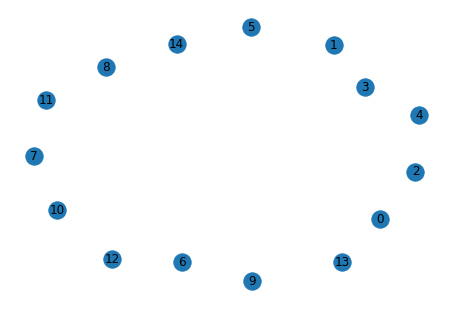

In [8]:
for index in index_set:
    G.add_node(index)
    
nx.draw(G, with_labels =1)
plt.show()

In [ ]:
# Next add edges to graph



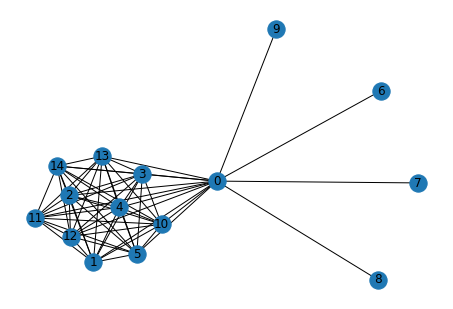

In [13]:
for index, commuting_indices in data:
    for i in range(len(commuting_indices)):
        
        if commuting_indices[i] != []:
            G.add_edge(index, commuting_indices[i])
        
nx.draw(G, with_labels=1)
plt.show()

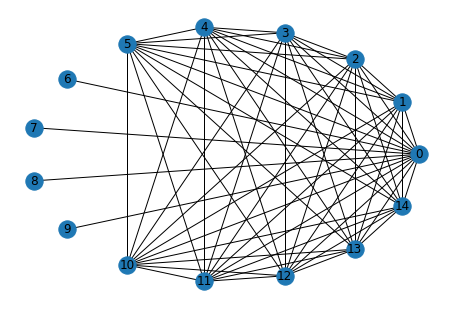

In [19]:
pos=nx.circular_layout(G)
nx.draw(G,pos,with_labels=1)
plt.show()

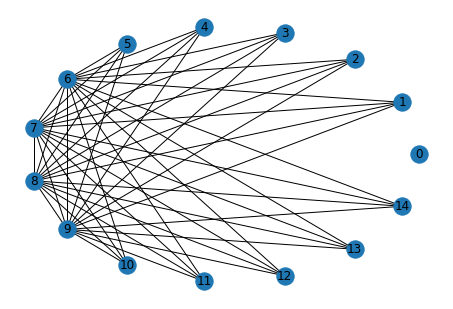

In [66]:
# complementary Graph

G_comp = nx.complement(G)
pos=nx.circular_layout(G_comp)
nx.draw(G_comp,pos,with_labels=1)
plt.show()

In [67]:
greedy = nx.greedy_color(G_comp, strategy='largest_first', interchange=False)
print(greedy)

{6: 0, 7: 1, 8: 2, 9: 3, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 0: 0}


In [68]:
# store the names (the keys of the new dict) as a set (keeps elements unique)
unique_colours = set(greedy.values())

# use a list comprehension, iterating through keys and checking the values match each n
colour_key_for_nodes = {}
for colour in unique_colours:
    colour_key_for_nodes[colour] = [k for k in greedy.keys() if greedy[k] == colour]
print(colour_key_for_nodes)

{0: [6, 0], 1: [7], 2: [8], 3: [9], 4: [1, 2, 3, 4, 5, 10, 11, 12, 13, 14]}


[]

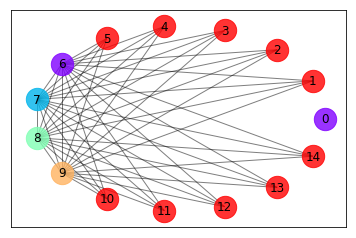

In [69]:
import matplotlib.cm as cm
import numpy as np


colour_list = cm.rainbow(np.linspace(0, 1, len(d)))

for colour in colour_key_for_nodes:
    nx.draw_networkx_nodes(G_comp,pos,
                       nodelist=d[colour],
                       node_color=colour_list[colour],
                       node_size=500,
                   alpha=0.8)
    
nx.draw_networkx_edges(G_comp,pos,width=1.0,alpha=0.5)

nx.draw_networkx_labels(G_comp, pos) 
#nx.draw(G_comp, pos, with_labels=1)
plt.plot()

In [24]:
import matplotlib.cm as cm
import numpy as np

ys = [1,2,3,4,5,6,7,8]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.17647059e-01 4.29120609e-01 9.75511968e-01 1.00000000e+00]
 [7.25490196e-02 7.82927610e-01 9.00586702e-01 1.00000000e+00]
 [3.54901961e-01 9.74138602e-01 7.82927610e-01 1.00000000e+00]
 [6.45098039e-01 9.74138602e-01 6.22112817e-01 1.00000000e+00]
 [9.27450980e-01 7.82927610e-01 4.34676422e-01 1.00000000e+00]
 [1.00000000e+00 4.29120609e-01 2.19946358e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
